In [1]:
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
df=pd.read_csv(r'C:\Users\admin\Downloads\database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df.iloc[:,0].value_counts())
print(df.iloc[:,1].value_counts())
#First two columns have same value Therfore drop these
df=df.iloc[:,2:]


IND    907
Name: country, dtype: int64
India    907
Name: country_long, dtype: int64


In [4]:
#Now name column and gppd_idnr column have every value unique
#Therefore drop the also
df=df.iloc[:,2:]
df['owner'].value_counts()
#We can see that following label have many values and does not give important info
#Thgerfore delete then
df=df.drop(columns=['owner','source','url','generation_data_source'])

In [5]:
#Follownf columns have many missing values therfore delete them
print(df.isna().sum())
df=df.drop(columns=['commissioning_year','year_of_capacity_data','other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019','estimated_generation_gwh'])

capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
estimated_generation_gwh    907
dtype: int64


In [6]:
df.isna().sum()
df=df.dropna()


In [7]:
print(df['geolocation_source'].value_counts())
df = pd.get_dummies(df, columns=['geolocation_source'], drop_first = True)


WRI                                     738
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


In [8]:
#MAke independent and dependent 
y=df['primary_fuel']
x=df.drop(columns='primary_fuel')
print(y.value_counts())
from sklearn.preprocessing import LabelEncoder as le
enc=le()
y=enc.fit_transform(y)

Coal       253
Hydro      233
Solar      123
Wind       108
Gas         68
Biomass     50
Oil         17
Nuclear      9
Name: primary_fuel, dtype: int64


# Classification

In [9]:
classifier = ('Gradient Boosting','Random Forest','Decision Tree','K-Nearest Neighbor')
y_pos = np.arange(len(classifier))
score = []

In [10]:
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('Accuracy:',(scores.mean()*100))

Accuracy: 73.63960209705606


In [11]:
clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('accuracy of Random Forest:', (scores.mean()*100))

accuracy of Random Forest: 74.21965317919074


In [12]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('accuracy of Decision Tree',(scores.mean()*100))

accuracy of Decision Tree 70.6190348165076


In [13]:
clf = KNeighborsClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('accuracy of KNeighbours',(scores.mean()*100))

accuracy of KNeighbours 54.940180131738146


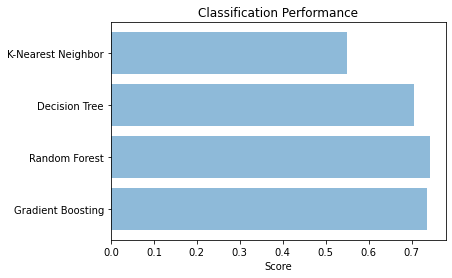

In [14]:
#Plotting result 
plt.barh(y_pos, score, align='center', alpha=0.5)
plt.yticks(y_pos, classifier)
plt.xlabel('Score')
plt.title('Classification Performance')
plt.show()

# Regression

In [15]:
#To predict Capacity make capacity as dependent
x['primary_fuel']=y
y=x['capacity_mw']
print(x.columns)

Index(['capacity_mw', 'latitude', 'longitude',
       'geolocation_source_National Renewable Energy Laboratory',
       'geolocation_source_WRI', 'primary_fuel'],
      dtype='object')


In [16]:
regressor = ('Gradient Boosting','Random Forest','Decision Tree','K-Nearest Neighbor')
y_pos = np.arange(len(regressor))
score = []

In [17]:
reg = GradientBoostingRegressor()
scores = cross_val_score(reg, x, y,cv=5,scoring='r2')
score.append(scores.mean())
print('R2-score:',(scores.mean()))

R2-score: 0.9993249690781278


In [18]:
reg = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(reg, x, y,cv=5,scoring='r2')
score.append(scores.mean())
print('R2-score of Random Forest:', (scores.mean()))

R2-score of Random Forest: 0.9968837502549317


In [19]:
reg = DecisionTreeRegressor()
scores = cross_val_score(reg, x, y,cv=5,scoring='r2')
score.append(scores.mean())
print('R2-score of Decision Tree',(scores.mean()))

R2-score of Decision Tree 0.9958090372025531


In [20]:
reg = KNeighborsRegressor()
scores = cross_val_score(reg, x, y,cv=5,scoring='r2')
score.append(scores.mean())
print('R2-score of KNeighbours',(scores.mean()))

R2-score of KNeighbours 0.9937804537378561


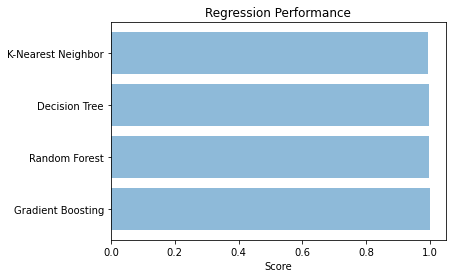

In [21]:
plt.barh(y_pos, score, align='center', alpha=0.5)
plt.yticks(y_pos, regressor)
plt.xlabel('Score')
plt.title('Regression Performance')
plt.show()